# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [26]:
tickers = ['OWL','ORCL','BA','RBLX','XOM']
start = '2020-08-13'
end = '2025-8-12'

stocks = yf.download(tickers,start,end)
stocks = stocks['Close']

C:\Users\mynul\AppData\Local\Temp\ipykernel_10916\787847656.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(tickers,start,end)
[*********************100%***********************]  5 of 5 completed


In [39]:
stocks

Ticker,BA,ORCL,OWL,RBLX,XOM
Date,,,,,
2020-08-13,174.729996,50.270805,NaN,NaN,34.624607
2020-08-14,178.080002,50.438313,NaN,NaN,34.777565
2020-08-17,172.009995,50.242889,NaN,NaN,34.326740
2020-08-18,170.229996,51.350304,NaN,NaN,34.157692
2020-08-19,169.270004,52.299500,NaN,NaN,33.779316
...,...,...,...,...,...
2025-08-05,224.860001,255.669998,19.132748,127.110001,106.251289
2025-08-06,225.039993,256.429993,19.320614,134.139999,105.528023
2025-08-07,227.330002,249.389999,18.727350,129.630005,104.973183


In [28]:
mean_daily_ret = stocks.pct_change().mean()
mean_daily_ret

Ticker
BA      0.000499
ORCL    0.001503
OWL     0.001044
RBLX    0.001578
XOM     0.001052
dtype: float64

In [29]:
stocks.pct_change(1).corr()

Ticker,BA,ORCL,OWL,RBLX,XOM
Ticker,,,,,
BA,1.000000,0.220304,0.376617,0.264899,0.340660
ORCL,0.220304,1.000000,0.350200,0.192707,0.118276
OWL,0.376617,0.350200,1.000000,0.292868,0.210404
RBLX,0.264899,0.192707,0.292868,1.000000,0.070495
XOM,0.340660,0.118276,0.210404,0.070495,1.000000


# Simulating Thousands of Possible Allocations

<Axes: xlabel='Date'>

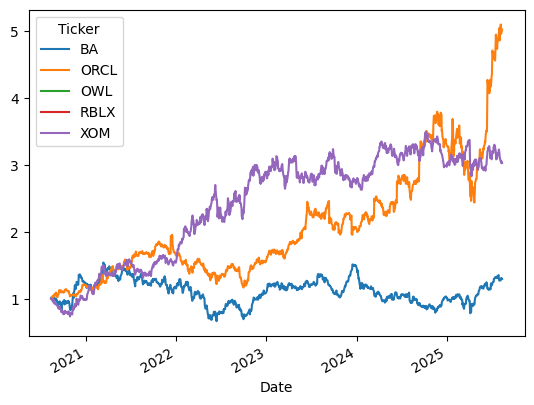

In [30]:
#Normalisation of prices
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [31]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

Ticker,BA,ORCL,OWL,RBLX,XOM
Date,,,,,
2020-08-13,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.019172,0.003332,NaN,NaN,0.004418
2020-08-17,-0.034086,-0.003874,NaN,NaN,-0.012963
2020-08-18,-0.010348,0.022041,NaN,NaN,-0.004925
2020-08-19,-0.005639,0.018485,NaN,NaN,-0.011077


In [32]:
#Calculating Log returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

Ticker,BA,ORCL,OWL,RBLX,XOM
Date,,,,,
2020-08-13,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.018991,0.003327,NaN,NaN,0.004408
2020-08-17,-0.034680,-0.003882,NaN,NaN,-0.013048
2020-08-18,-0.010402,0.021802,NaN,NaN,-0.004937
2020-08-19,-0.005655,0.018316,NaN,NaN,-0.011139


In [33]:
log_ret.mean() * 252

Ticker
BA      0.051711
ORCL    0.324744
OWL     0.174222
RBLX    0.143455
XOM     0.222839
dtype: float64

In [34]:
# Compute pairwise covariance of columns
log_ret.cov()

Ticker,BA,ORCL,OWL,RBLX,XOM
Ticker,,,,,
BA,0.000588,0.000111,0.000236,0.000282,0.000151
ORCL,0.000111,0.000426,0.000198,0.000188,0.000045
OWL,0.000236,0.000198,0.000705,0.000356,0.000099
RBLX,0.000282,0.000188,0.000356,0.002016,0.000057
XOM,0.000151,0.000045,0.000099,0.000057,0.000335


In [35]:
log_ret.cov()*252 # multiply by days

Ticker,BA,ORCL,OWL,RBLX,XOM
Ticker,,,,,
BA,0.148091,0.027987,0.059510,0.070954,0.038024
ORCL,0.027987,0.107309,0.049792,0.047446,0.011419
OWL,0.059510,0.049792,0.177735,0.089796,0.025019
RBLX,0.070954,0.047446,0.089796,0.508145,0.014272
XOM,0.038024,0.011419,0.025019,0.014272,0.084466


## Single Run for Some Random Allocation

In [36]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(tickers)))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['BA', 'ORCL', 'OWL', 'RBLX', 'XOM'], dtype='object', name='Ticker')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698]


Rebalance to sum to 1.0
[0.26182041 0.28933544 0.01443678 0.08696357 0.3474438 ]


Expected Portfolio Return
0.19991351952950231


Expected Volatility
0.233428837364081


Sharpe Ratio
0.8564216905972738


### Now we will run this 15000 times

In [37]:
GMV_ret = ret_arr[vol_arr.argmin()]
GMV_vol = vol_arr[vol_arr.argmin()]

## Plotting the data and adding Global Minimum Variance

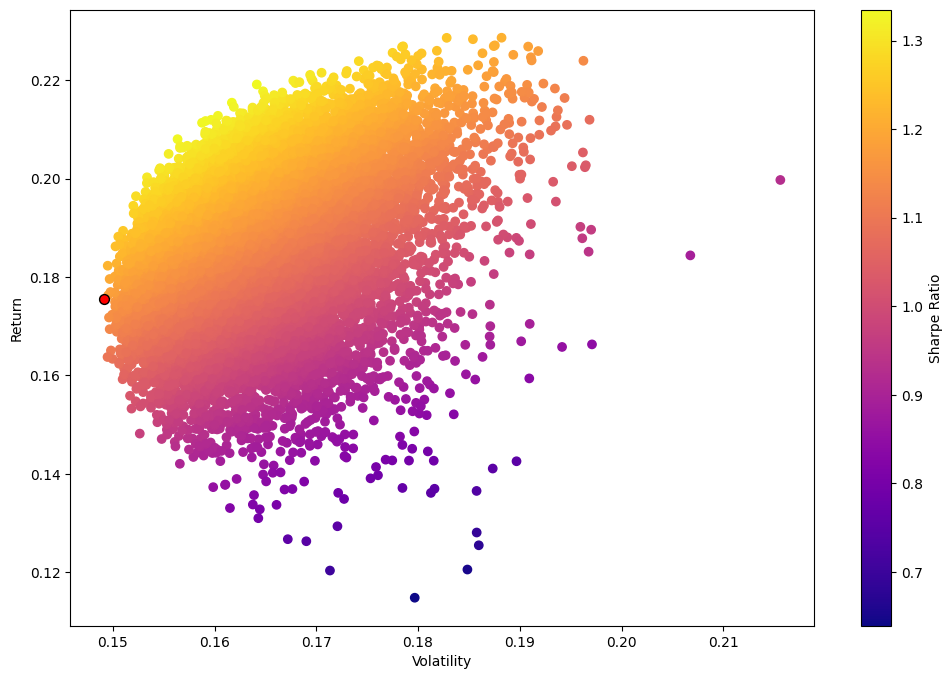

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(GMV_vol,GMV_ret,c='red',s=50,edgecolors='black')
plt.savefig('Port_optimisation',bbox_inches='tight')